In [12]:
# importing the library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# read the data
hr = pd.read_csv('/content/drive/MyDrive/IDP - BigData/hr-clean.csv')
# hr.head(50)

### Procurando por correlação

In [ ]:
# Seaborn options
sns.set_style("whitegrid")

# Subset the dataset into all the numerical values
numeric_hr = hr.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric_hr._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0,
                      vmax = 1, square=True, linewidths=.5, ax=ax)
plt.savefig('corr-heat.png')
plt.show()

Insights

*   **Total de anos trabalhados** é altamente correlacionado ao **Nivel emprego** (Job level)
*   **Salario mês** é altamente correlacionado a **Nivel emprego**
*  Idade é correlacionada a **Nivel emprego** e **Educação**
* **Balanço de vida** não é correlacionado a nenhuma variavel.


In [ ]:
hr.describe()

Insights

*   **Idade média** dos colaboradores é de 37 anos
*   Colaboradores recebem **promoções** entre 2 e 5 anos
*   **Tempo médio de permanência** é de 7 anos
*   Niguém possui **taxa de performance** menor do que 3.
*   Colaboradores recebem cerca de 2-3 **treinamentos** por ano.


### Quem deixa a empresa?

Current Employees    13572
Former Employees      2646
Name: Attrition, dtype: int64


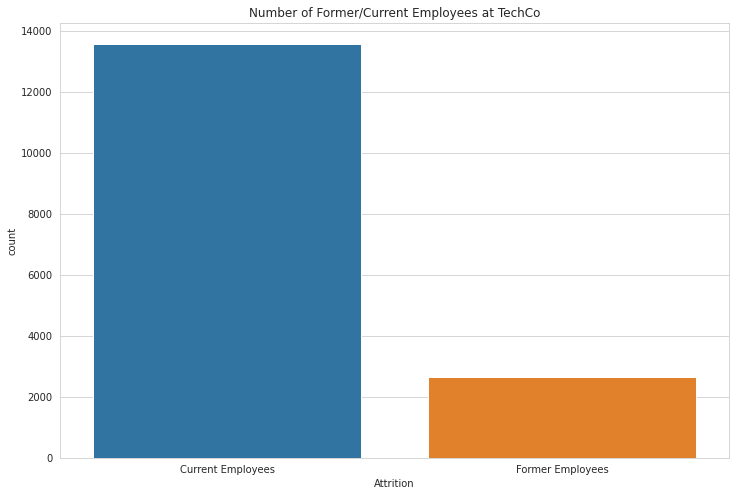

In [21]:
print(hr.Attrition.value_counts())

# Easier to join all leaver together for my analyses considering there are very few terminations
hr['Attrition'] = hr['Attrition'].replace("Termination", "Voluntary Resignation")
hr['Attrition'] = hr['Attrition'].replace("Voluntary Resignation", "Former Employees")
hr['Attrition'] = hr['Attrition'].replace("Current employee", "Current Employees")

plt.figure(figsize=(12,8))
plt.title('Number of Former/Current Employees at TechCo')
sns.countplot(x="Attrition", data=hr)



* Pouca gente deixou a empresa

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


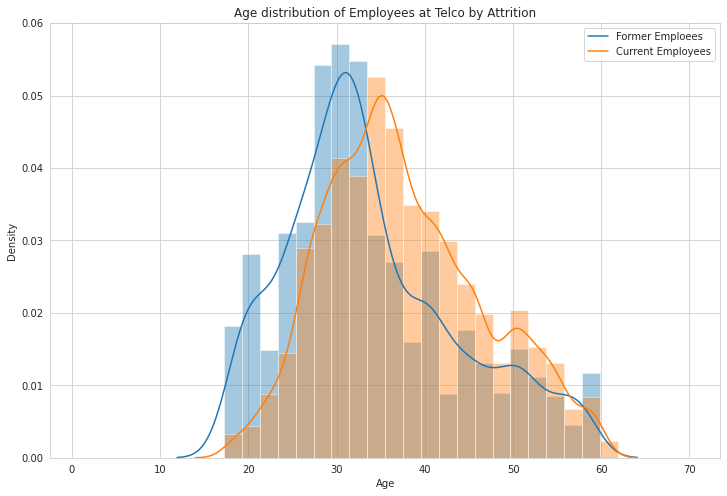

In [22]:
# Plot the distribution of age by Attrition Factor
plt.figure(figsize=(12,8))
plt.title('Age distribution of Employees at Telco by Attrition')
sns.distplot(hr.Age[hr.Attrition == 'Former Employees'], bins = np.linspace(1,70,35))
sns.distplot(hr.Age[hr.Attrition == 'Current Employees'], bins = np.linspace(1,70,35))
plt.legend(['Former Emploees','Current Employees'])



*   Maioria dos empregados sairam por volta dos 30 anos
*   Poblema rentendo empregados mais jovens?
*   Por quanto tempo os empregados ficam na empresa? A maioria sai no primeiro ano?



In [ ]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Distribution of the Number of Years Employees Spend at Telco by Attrition')

sns.distplot(hr.YearsAtCompany[hr.Attrition == 'Former Employees'], bins = np.linspace(0,40,40))
sns.distplot(hr.YearsAtCompany[hr.Attrition == 'Current Employees'], bins = np.linspace(0,40,40))
plt.legend(['Former Emploees','Current Employees'])



*   A maioria das saidas voluntarias ocorrem no primeiro ano de treabalho. Mais de 20% dos colaboradores pedem para sair no primeiro ano.
*   A maioria dos colaboradores está na empresa a menos de 10 anos. Talvez apenas os melhores e mais inteligentes permaneçam após 10 anos.




Será que quem trabalhar mais, está mais propenso a ir embora?

In [ ]:
# Plot out the counts of OverTime
sns.factorplot("Attrition", col="OverTime", data=hr, kind="count", col_wrap=2, size=5)
plt.subplots_adjust(top=.85)
plt.suptitle('Attrition Counts by whether an Employee worked Over Time')


Aparentemente colaboradores que trabalharam a mais, permanecem menos. (teste estatistico)

E esses colaboradores que trabalham a mais, tem menos de 30 anos?

In [ ]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Employees who have worked Over Time')

sns.distplot(hr.Age[hr.OverTime == 'Yes'], bins = np.linspace(0,70,35))

#sns.distplot(hr.Age[hr.Attrition == 'Former Employees'], bins = np.linspace(1,70,35))
sns.distplot(hr.Age[hr.Attrition == 'Current Employees'], bins = np.linspace(1,70,35))

* A empresa não discrimina quem trablalha a mais! Jovens ou senhores! Segue praticamente a mesma distribuição de idade. 


### Igualdede de gênero

58.324084350721414

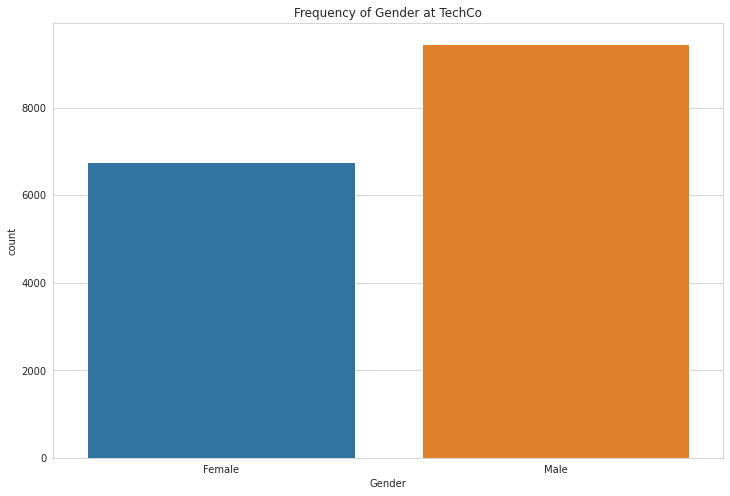

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gender", data=hr)

plt.title('Frequency of Gender at TechCo')
hr['Gender'].value_counts().Male/hr['Gender'].count()*100



*   58% dos colaboradores são homens
*   42% são mulheres



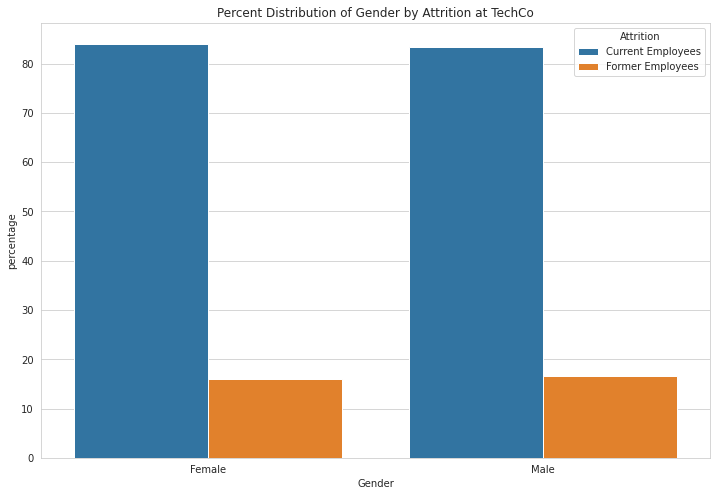

In [19]:
# First lets cast these string columns into categories
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in cats:
    hr[col] = hr[col].astype('category')

group_hr = hr.groupby(cats)

# Plot the distribution of females in this workplace
plt.figure(figsize=(12,8))
#sns.countplot(x="Gender", hue="Attrition", data=hr[hr['Attrition'].isin(['Voluntary Resignation', 'Termination'])])

attrition_counts = (hr.groupby(['Gender'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Attrition'))
plt.title('Percent Distribution of Gender by Attrition at TechCo')
sns.barplot(x="Gender", y="percentage", hue="Attrition", data=attrition_counts)





*   Mas a taxa de demissão voluntaria é praticamente a mesma entre os sexos.



E sobre viagens? Mulheres ou homens viajam mais?

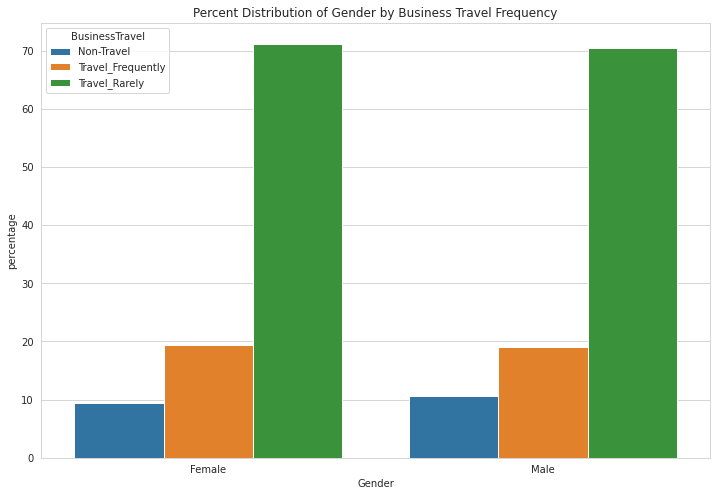

In [20]:
# Plot the distribution of females in this workplace
plt.figure(figsize=(12,8))
#sns.countplot(x="Gender", hue="Attrition", data=hr[hr['Attrition'].isin(['Voluntary Resignation', 'Termination'])])

attrition_counts = (hr.groupby(['Gender'])['BusinessTravel']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('BusinessTravel'))
plt.title('Percent Distribution of Gender by Business Travel Frequency')
sns.barplot(x="Gender", y="percentage", hue="BusinessTravel", data=attrition_counts) 




*   Novamente, não há diferença.



E dentro dos setores da empresa? Há desigualdede de gênero?

In [ ]:
# Plot the distribution of females in this workplace
plt.figure(figsize=(12,8))

attrition_counts = (hr.groupby(['Gender'])['Department']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Department'))
plt.title('Distribution of Gender across Departments')
sns.barplot(x="Gender", y="percentage", hue="Department", data=attrition_counts) 



*   Distribuiçoes muito parecidas! Incrivel. 



In [ ]:
# Plot the distribution of age by gender
plt.figure(figsize=(12,8))
sns.distplot(hr.Age[hr.Gender == 'Male'], bins = np.linspace(0,70,35))
sns.distplot(hr.Age[hr.Gender == 'Female'], bins = np.linspace(0,70,35))
plt.title('Distribution of Age by Gender')
plt.legend(['Males','Females'])



*   Distribuição parecidas entre homens e mulheres
*   Maior densidade de homens na média de 36 - 38 anos porque existem mais homens na empresa (58%)



E em relação a salario? Há igualdade?

In [ ]:
# It appears women are under-represented at this company. Let's see if they get paid less.
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender')
sns.barplot(x="Gender", y="MonthlyIncome", data=hr)


*  Mulheres ganham um pouco a mais do que os homens!

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Monthly Income by Gender')
sns.distplot(hr.MonthlyIncome[hr.Gender == 'Male'], bins = np.linspace(0,20000,20))
sns.distplot(hr.MonthlyIncome[hr.Gender == 'Female'], bins = np.linspace(0,20000,20))
plt.legend(['Males','Females'])

* A maioria dos salarios é de 2-3k, onde podemos observar mais homens do que mulheres

Casados ganham mais do que solteiros?

In [ ]:
# What about all the single ladies?
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Gender", data=hr)



*   Menos mulheres do que homens na empresa
*   As mulheres ganham mais do que os homens
*   Os dois generos pedem demissão na mesma taxa!
*   Colaboradores casados tem vantagem. Mas isso pode ser porque pessoas casadas sao mais velhas do que as solteiras em média...





In [ ]:
# Trying to get a binned distribution in of Age by MonthlyIncome in Seaborn
plt.figure(figsize=(15,15))
bins=[18, 25, 35, 50, 70]
out = hr.groupby(pd.cut(hr['Age'], bins=bins, include_lowest=True)).aggregate(np.mean)

out['Age Bracket'] = ['18-25', '26-35', '36-50', '51-70']

# Fixed X-axis labels currently looking awful!
plt.title('Average Monthly Income by Age Bracket')
sns.barplot('Age Bracket', 'MonthlyIncome', data=out, palette="muted")


O salario cresce linearmente com a idade! Que pode estar correlacionado com o tempo de empresa.

In [ ]:
# Trying to get a binned distribution in of Age by MonthlyIncome in Seaborn
plt.figure(figsize=(15,15))
bins=[0, 10, 20, 30, 40]
out = hr.groupby(pd.cut(hr['YearsAtCompany'], bins=bins, include_lowest=True)).aggregate(np.mean)
out[['YearsAtCompany']] = out[['YearsAtCompany']].applymap(str)
out['Years at Company Bracket'] = ['0-10', '11-20', '21-30', '31-40']

# Fixed X-axis labels currently looking awful!
plt.title('Average Monthly Income by Years Worked at TechCo')
sns.barplot('Years at Company Bracket', 'MonthlyIncome', data=out, palette="muted")


In [ ]:
plt.figure(figsize=(15,15))
sns.lmplot("YearsAtCompany", "MonthlyIncome", data=hr, size=10) 